In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
df = pd.read_csv('./Medicalpremium.csv')
df_og =  df.copy()
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [4]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

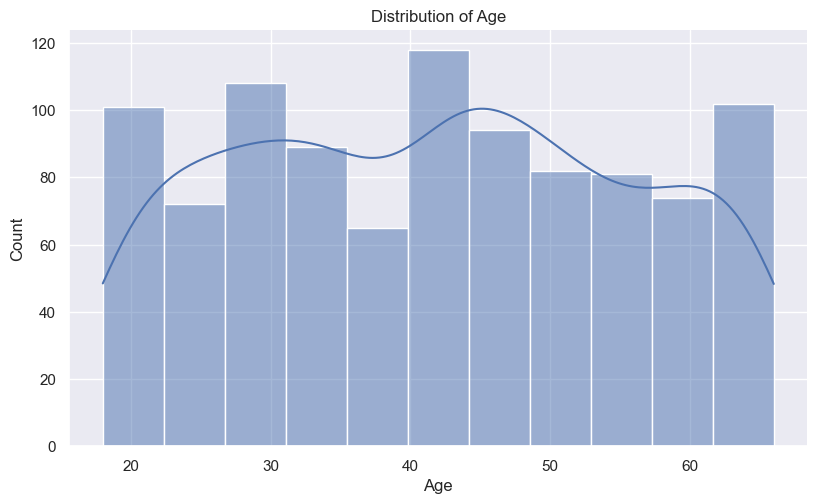

In [5]:
sns.displot(x='Age', data=df, aspect=10/6, kde=True)
plt.title('Distribution of Age')
plt.show()

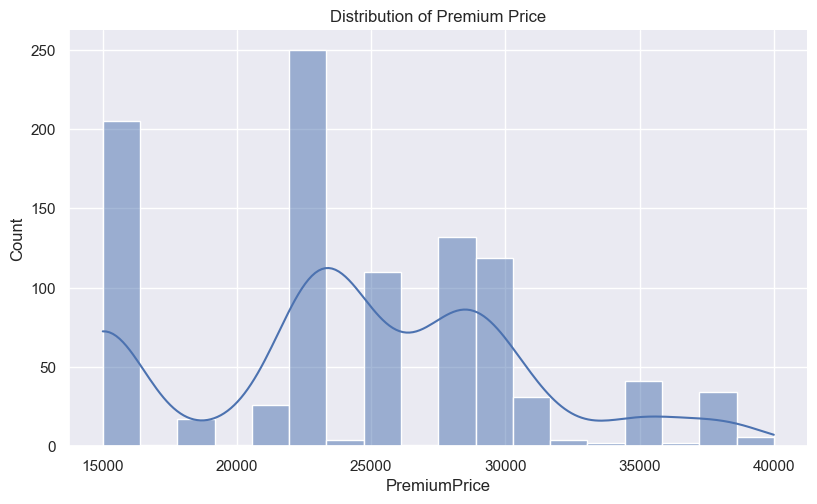

In [6]:
sns.displot(x='PremiumPrice', data=df, aspect=10/6, kde=True)
plt.title('Distribution of Premium Price')
plt.show()

In [7]:
pr_lab = ['Low', 'Basic', 'Average', 'High', 'SuperHigh']
df['PremiumLabel'] = pd.cut(df['PremiumPrice'], bins=5, labels=pr_lab, precision=0)
df['AgeLabel'] = pd.cut(df['Age'], bins=5, labels=pr_lab, precision=0)
df['WeightLabel'] = pd.cut(df['Weight'], bins=5, labels=pr_lab, precision=0)
df['HeightLabel'] = pd.cut(df['Height'], bins=5, labels=pr_lab, precision=0)

In [8]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average


In [9]:
df.groupby(['PremiumLabel', 'AnyTransplants'])['AnyTransplants'].count()

C:\Users\ama.D.eus\AppData\Local\Temp\ipykernel_9732\2364166746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['PremiumLabel', 'AnyTransplants'])['AnyTransplants'].count()


PremiumLabel  AnyTransplants
Low           0                 213
              1                  11
Basic         0                 382
              1                   1
Average       0                 252
              1                   7
High          0                  76
              1                   2
SuperHigh     0                   8
              1                  34
Name: AnyTransplants, dtype: int64

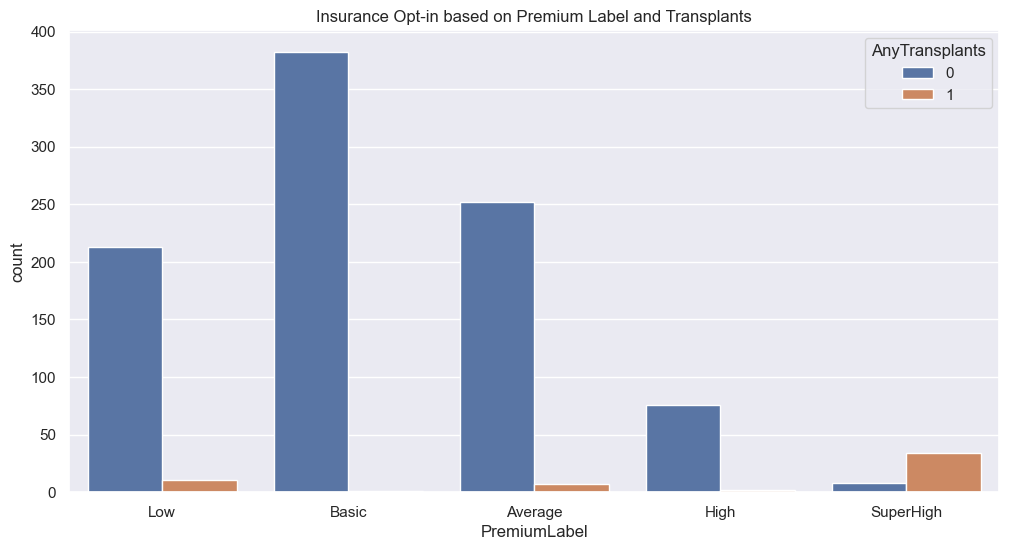

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='PremiumLabel', hue='AnyTransplants', data=df, ax=ax)
plt.title('Insurance Opt-in based on Premium Label and Transplants')
plt.show()

In [11]:
df.groupby(['PremiumLabel', 'NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

C:\Users\ama.D.eus\AppData\Local\Temp\ipykernel_9732\6305202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['PremiumLabel', 'NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()


PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

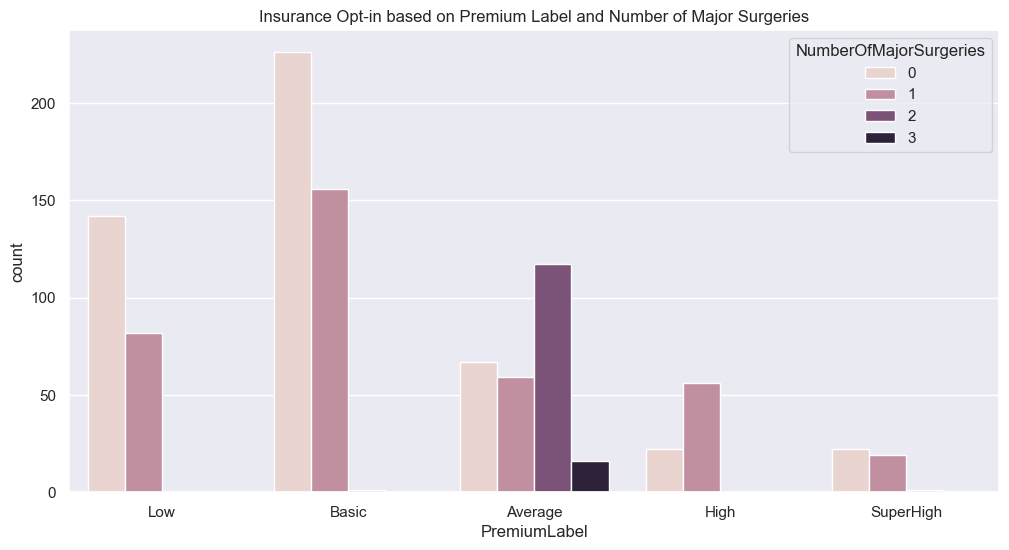

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='PremiumLabel', hue='NumberOfMajorSurgeries', data=df, ax=ax)
plt.title('Insurance Opt-in based on Premium Label and Number of Major Surgeries')
plt.show()

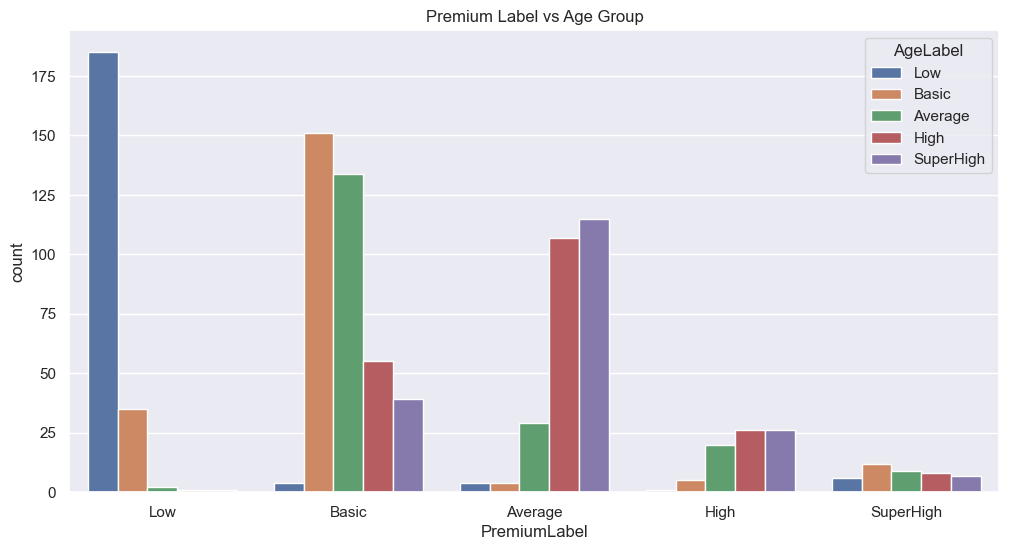

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='PremiumLabel', hue='AgeLabel', data=df, ax=ax)
plt.title('Premium Label vs Age Group')
plt.show()

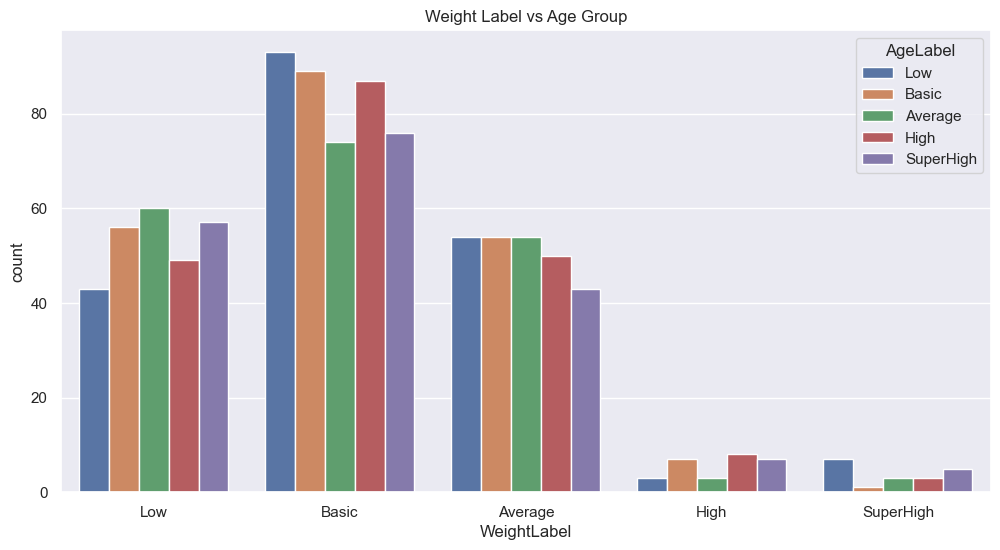

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='WeightLabel', hue='AgeLabel', data=df, ax=ax)
plt.title('Weight Label vs Age Group')
plt.show()

C:\Users\ama.D.eus\AppData\Local\Temp\ipykernel_9732\2154617745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeLabel'])['PremiumPrice'].mean().plot(kind='bar', color='skyblue')


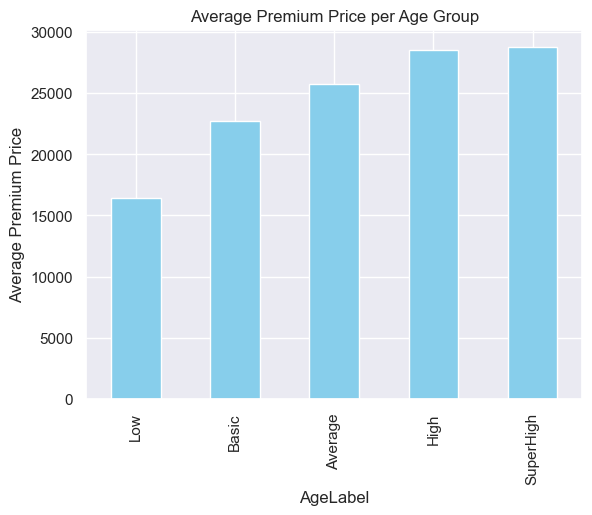

In [15]:
df.groupby(['AgeLabel'])['PremiumPrice'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Premium Price per Age Group')
plt.ylabel('Average Premium Price')
plt.show()

In [16]:
df = pd.get_dummies(data=df, columns=['AgeLabel', 'PremiumLabel', 'WeightLabel', 'HeightLabel'])

In [17]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,...,WeightLabel_Low,WeightLabel_Basic,WeightLabel_Average,WeightLabel_High,WeightLabel_SuperHigh,HeightLabel_Low,HeightLabel_Basic,HeightLabel_Average,HeightLabel_High,HeightLabel_SuperHigh
0,45,0,0,0,0,155,57,0,0,0,...,True,False,False,False,False,False,True,False,False,False
1,60,1,0,0,0,180,73,0,0,0,...,False,True,False,False,False,False,False,False,False,True
2,36,1,1,0,0,158,59,0,0,1,...,True,False,False,False,False,False,True,False,False,False
3,52,1,1,0,1,183,93,0,0,2,...,False,False,True,False,False,False,False,False,False,True
4,38,0,0,0,1,166,88,0,0,1,...,False,False,True,False,False,False,False,True,False,False


In [18]:
from sklearn.model_selection import train_test_split

X = df_og.drop('PremiumPrice', axis=1)  
y = df_og['PremiumPrice']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r2}\n")
    
    return {
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2
    }

In [21]:
results = []

## 1. Linear Regression

In [22]:
lr_model = LinearRegression()
results.append(evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression"))

Linear Regression Performance:
RMSE: 3495.9493282738254
MAE: 2586.225384068108
R-squared: 0.7133944270278739



## 2. Random Forest Regressor

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest Regressor"))

Random Forest Regressor Performance:
RMSE: 2305.8062416956077
MAE: 1024.4444444444443
R-squared: 0.8753190813557862



## 3. Gradient Boosting Regressor

In [24]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor"))

Gradient Boosting Regressor Performance:
RMSE: 2477.8731818624883
MAE: 1498.770254926496
R-squared: 0.8560165673505893



## 4. XGBoost Regressor

In [25]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost Regressor"))

XGBoost Regressor Performance:
RMSE: 2929.5068287608906
MAE: 1340.515195904356
R-squared: 0.7987465262413025



## 5. CatBoost Regressor

In [26]:
cat_model = CatBoostRegressor(verbose=0, iterations=100, random_state=42)
results.append(evaluate_model(cat_model, X_train, X_test, y_train, y_test, "CatBoost Regressor"))

CatBoost Regressor Performance:
RMSE: 2554.537249979089
MAE: 1560.4148502688734
R-squared: 0.8469691986841172



In [27]:
results_df = pd.DataFrame(results)
results_df

,Model,RMSE,MAE,R-squared
0,Linear Regression,3495.949328,2586.225384,0.713394
1,Random Forest Regressor,2305.806242,1024.444444,0.875319
2,Gradient Boosting Regressor,2477.873182,1498.770255,0.856017
3,XGBoost Regressor,2929.506829,1340.515196,0.798747
4,CatBoost Regressor,2554.537250,1560.414850,0.846969


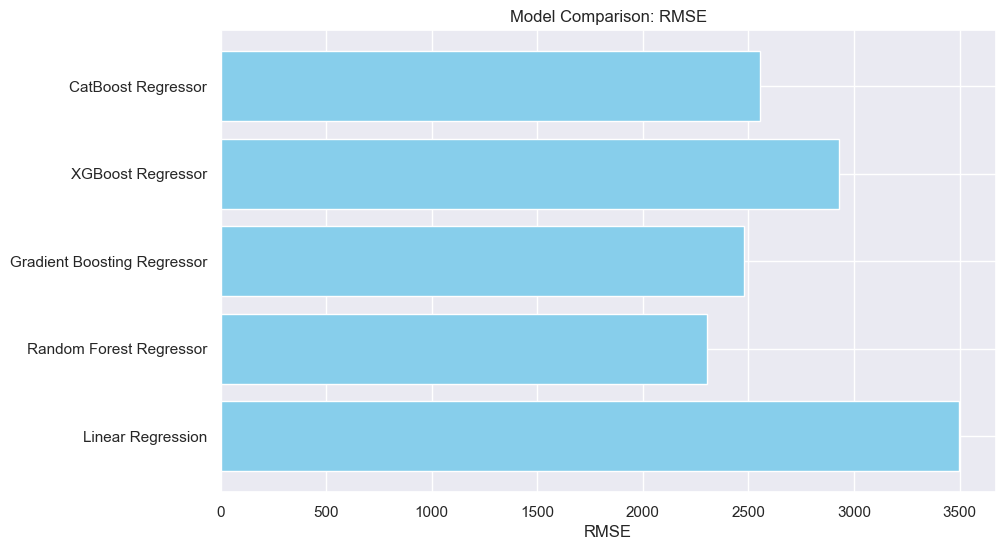

In [28]:
plt.figure(figsize=(10,6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.show()

## Stacking Meta Model

In [29]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [30]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, iterations=100, random_state=42))
]

In [31]:
meta_model = LinearRegression()

In [32]:
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5  
)

In [33]:
stacking_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x0000027CC8EEB0B0>)],
                  final_estimator=LinearRegression())

In [34]:
y_pred_stack = stacking_model.predict(X_test)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

In [35]:
print("Stacking Model Performance:")
print(f"RMSE: {rmse_stack}")
print(f"MAE: {mae_stack}")
print(f"R-squared: {r2_stack}")

Stacking Model Performance:
RMSE: 2235.7151387175354
MAE: 1224.4859805539006
R-squared: 0.8827838891501907


In [36]:
import pickle

In [37]:
with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

In [38]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [39]:
with open('stacking_model.pkl', 'rb') as f:
    loaded_stacking_model = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

In [42]:
new_data = pd.DataFrame({
    'Age': [45],                         
    'Diabetes': [1],           
    'BloodPressureProblems': [0],
    'AnyTransplants': [0],     
    'AnyChronicDiseases': [1], 
    'Height': [170],                     
    'Weight': [70],                      
    'KnownAllergies': [0],     
    'HistoryOfCancerInFamily': [1],
    'NumberOfMajorSurgeries': [2],                 
})

new_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,1,0,0,1,170,70,0,1,2


In [43]:
stacking_pred_new = loaded_stacking_model.predict(new_data)
rf_pred_new = loaded_rf_model.predict(new_data)

In [44]:
print(f"Prediction from Stacking Model for new data: {stacking_pred_new[0]}")
print(f"Prediction from Random Forest Model for new data: {rf_pred_new[0]}")

Prediction from Stacking Model for new data: 28987.107924454755
Prediction from Random Forest Model for new data: 28720.0
